Group 7 Project Submission



    Student names:   JANE MARTHA
                     JAMES NJOROGE
                     LEON MAINA
                     DANIEL WAHOME
                     MAGDALENE ONDIMU
                     FAITH MWENDA
                     
    Student pace:    PART TIME
    
    Instructor name: NOAH KANDIE
                     WILLIAM OKOMBA



In [1]:
# import standard packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
import warnings
warnings.filterwarnings ('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats
import statsmodels.api as sm
import statsmodels.graphics as smg
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt

In [2]:
#Loading data set for Analysis
kc = pd.read_csv(r"C:\Users\HP\Documents\Flatiron\Assignments\Phase 2 Project\kc_house_data.csv")

kc.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#Data understanding and exploration
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#changing the selling date to  and updating the column name to yr_sold
kc['date']=pd.to_datetime(kc['date'])
kc['date'] = kc['date'].dt.year


In [6]:
kc.rename (columns={'date': 'yr_sold'}, inplace=True)

In [8]:
kc['yr_sold']= kc['yr_sold'].astype(int)

In [9]:
kc.head(5)

,id,yr_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
kc.isna().sum()

id                  0
yr_sold             0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
#Filling missing values in the 'view' and 'waterfront' columns
kc['waterfront'].fillna('NO', inplace=True)
kc['view'].fillna('NONE', inplace=True)
kc.isna().sum()

id                  0
yr_sold             0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#Counting the occurences of unique values in 'yr_revovated'
kc['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [13]:
kc['yr_renovated'].fillna(0.0, inplace=True)

In [14]:
kc['yr_renovated'].astype(int)

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int32

In [15]:
kc.isna().sum()

id               0
yr_sold          0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
yr_renovated = kc['yr_renovated']
kc['renovated_last_10'] = (yr_renovated >= (kc['yr_sold'] - 10))
kc['renovated_last_10'] = kc['renovated_last_10'].map({True: 'Yes', False: 'No'})

In [18]:
kc.head(5)

,id,yr_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10
0,7129300520,2014,221900,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,No
2,5631500400,2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,No
3,2487200875,2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,No


In [19]:
kc['Age'] = kc['yr_sold']-kc['yr_built']

In [20]:
kc.head(5)

,id,yr_sold,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10,Age
0,7129300520,2014,221900,3,1.00,1180,5650,1.0,NO,NONE,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,No,59
1,6414100192,2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,No,63
2,5631500400,2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,No,82
3,2487200875,2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,No,49
4,1954400510,2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,No,28


In [21]:
#Dropping columns that are not needed 
columns_to_drop = ['id','zipcode','lat','long','sqft_living15','sqft_lot15','sqft_basement','yr_sold','yr_renovated']
kc.drop(columns_to_drop, axis = 1, inplace = True)

In [22]:
#Confirming the new dataframe 
kc.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,renovated_last_10,Age
0,221900,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,1955,No,59
1,538000,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,1951,No,63
2,180000,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1933,No,82
3,604000,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,1965,No,49
4,510000,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,1987,No,28


Visualizing

In [24]:
#Creating a plotting function for ease or resizing in different plots
def resizeplot(l,a):
    plt.figure(figsize=(l,a));


<Figure size 432x288 with 0 Axes>

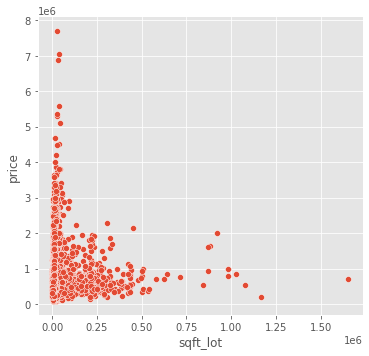

In [25]:
#Creating a plot that will visualize the relationship between price and sqft_lot
resizeplot(6,4)
sns.relplot(x='sqft_lot',y='price',data=kc,palette='terrain');
plt.show()

In [26]:
#Finding out the occurences of bedroom values
bedrooms_counts = kc['bedrooms'].value_counts()
bedrooms_counts

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

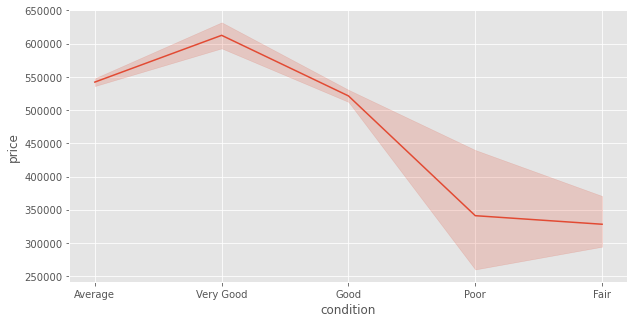

In [27]:
#Confirming how the conditon of the house over the year affects the price
#We can see that if the conditon of the house- is improved then the price of the house is higher
#Poor conditons leads to lower price
resizeplot(10,5)
sns.lineplot(x='condition',y='price',data=kc,palette='terrain')
plt.show()

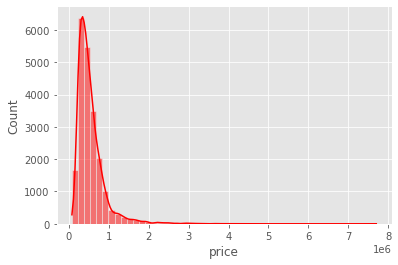

In [28]:
#Using histogram to visualize the distribution of the price
#As the count is high then the price increases
resizeplot(6,4)
sns.histplot(kc['price'],kde=True,bins=50, color = 'red');

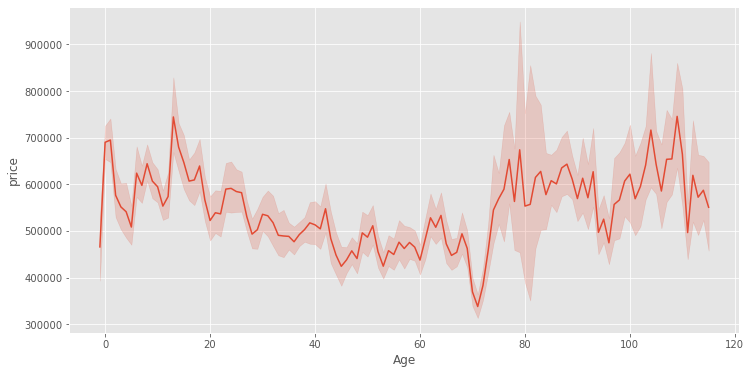

In [29]:
#Using linear to analyse price increament over the year
#At the begginging of the yrs the price is low as the yrs increases then the price has a higher peak

resizeplot(12,6)
sns.lineplot(x='Age',y='price',data=kc);

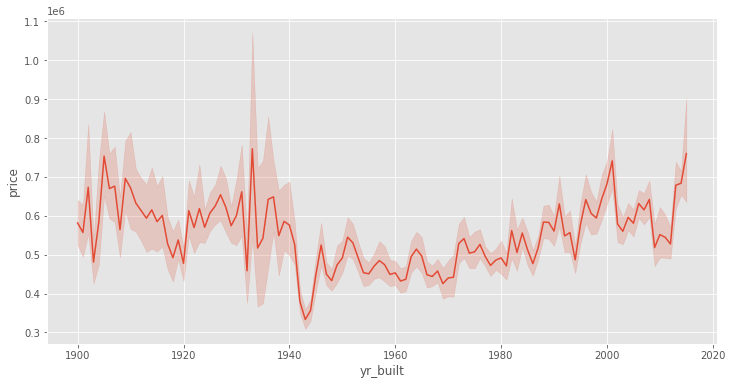

In [30]:
#Price trend over the years 
#The price from 2000 to 2015 was good meaning the owners of real estaste were getting good profit
#It seems that the houses had been reinovated

resizeplot(12,6)
sns.lineplot(x='yr_built',y='price',data=kc,palette = 'deep');

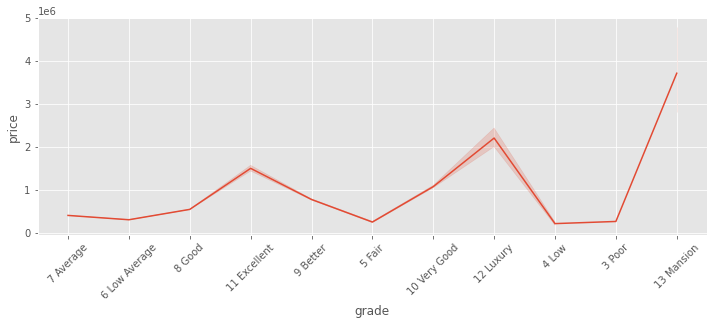

In [31]:
#Showing the price changes in relation to unit grade
# poor grade causes the price to decrease and vice versa
resizeplot(12,4)# changed the size to give a better view of the grade.
sns.lineplot(x='grade',y='price',data=kc,palette='terrain');
plt.xticks(rotation=45)
plt.show()

## Categorical Variables

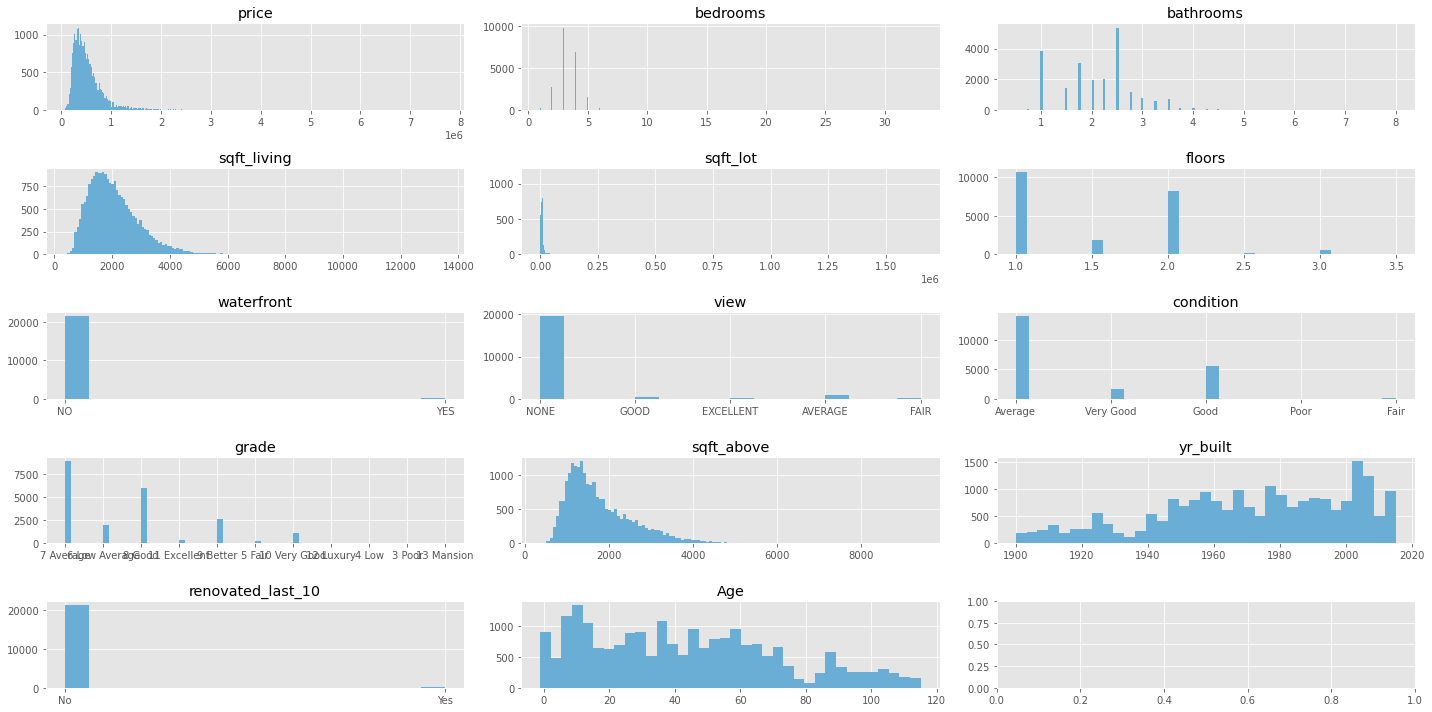

In [32]:
# Plotting histogram for columns within the dataset
#The histogram shows us how different features in each column affect each other

fig, axes = plt.subplots(nrows=(5), ncols=3, figsize=(20,10))
df_cols = kc.columns

# Using sns color pallets for each plot

color = sns.color_palette("Blues", n_colors=1)[0]

# creation of a function for plotting the hustogram for the given columns

for col, ax in zip(df_cols, axes.flatten()):
    ax.hist(kc[col].dropna(), bins='auto', color=color )
    ax.set_title(col)


# automatically adjusting subplot params so that the subplot(s) fits in to the figure area

fig.tight_layout()

In [33]:
#From the above plots we can see that floors,waterfront,condition,grade,renovated_last_10,bedrooms,bathrooms are categorical

#Creating a category of values to work with
categories = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'renovated_last_10']

for cate in categories:

    # getting the  value counts

    counts = kc[cate].value_counts()

    # Isolate offending categories for each variable

    bad_cate = counts[counts < 50].index

    # Isolate indices in the dataset where offending categories are found

    to_drop = kc[kc[cate].isin(bad_cate)].index
    # Dropping unnecessary data within the category in dataset
    kc.drop(to_drop, inplace=True)

In [34]:
# converting view into binary (binarzing)
#for consistent and easier to compare in the view.
view_dict = {
    'FAIR': 1,
    'AVERAGE': 1,
    'GOOD': 1,
    'EXCELLENT': 1,
    'NONE': 0
}

kc['view'] = kc['view'].map(view_dict)

# Binarizing waterfront
waterfront_dict = {
    'YES': 1,
    'NO': 0
}

kc['waterfront'] = kc['waterfront'].map(waterfront_dict)

# Binarizing renovated_last_10
renovated_dict = {
    'Yes': 1,
    'No': 0
}

kc['renovated_last_10'] = kc['renovated_last_10'].map(renovated_dict)

## OneHotEncoding

In [35]:
#Creating a copy of the dataset so as not to alter the original copy incase
kc2= kc.copy()

## Generating dummies

In [36]:
#Converting the 3columns: bedrooms,bathrooms,floors to string for pandas to be able to dumify them
col = ['bedrooms', 'bathrooms', 'floors']
kc[col] =  kc[col].astype(str)

In [37]:
#Checking if the conversion was successful
kc.dtypes

price                 int64
bedrooms             object
bathrooms            object
sqft_living           int64
sqft_lot              int64
floors               object
waterfront            int64
view                  int64
condition            object
grade                object
sqft_above            int64
yr_built              int64
renovated_last_10     int64
Age                   int64
dtype: object

In [38]:
# Creating variable from the already cleaned original dataset
kc_binary = kc[['waterfront', 'view', 'renovated_last_10']]
kc_num = kc[['price', 'sqft_living', 'sqft_lot', 'Age']]
kc_cate = kc[['floors', 'bedrooms', 'bathrooms', 'condition', 'grade']]

In [39]:
# Applying one-hot encoding to the categorical features
kc_cate_dummies = pd.get_dummies(kc_cate, dtype=int)

In [40]:
#Creating a list of dummies to be dropped

dummies_to_drop = [
    'floors_1.0',
    'bedrooms_1',
    'bathrooms_0.75',
    'condition_Fair',
    'grade_5 Fair'
    ]
#Dropping the specified dummies

kc_cate_dummies.drop(
    dummies_to_drop,
     axis = 1,
     inplace=True)

In [41]:
#Combining the variable into a single variable
kc = pd.concat([kc_num, kc_binary, kc_cate_dummies], axis=1)

In [42]:
#Confirming if the event was successful
kc.head()

,price,sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,538000,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,180000,770,10000,82,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,604000,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,510000,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [43]:
#Confirming the columns
kc.columns

Index(['price', 'sqft_living', 'sqft_lot', 'Age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'condition_Average',
       'condition_Good', 'condition_Very Good', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [44]:
#Setting the columns in an asceding order for easy analysis
grade_columns = [
    'grade_6 Low Average',
    'grade_7 Average',
    'grade_8 Good',
    'grade_9 Better',
    'grade_10 Very Good',
    'grade_11 Excellent',
    'grade_12 Luxury'
]

# Extracting other columns not related to 'grade'

other_columns = [col for col in kc.columns if col not in grade_columns]

# Reordering columns

reordered_columns = other_columns + grade_columns
kc = kc[reordered_columns]

In [45]:
#Accessing the columns
kc.columns

Index(['price', 'sqft_living', 'sqft_lot', 'Age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'condition_Average',
       'condition_Good', 'condition_Very Good', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury'],
      dtype='object')

In [46]:
#Accessing the columns and rows
kc.head()

,price,sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury
0,221900,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,538000,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,180000,770,10000,82,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,604000,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,510000,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Modeling

In [47]:
#Confirming the linear relationship between variable and price
kc_num.head()

,price,sqft_living,sqft_lot,Age
0,221900,1180,5650,59
1,538000,2570,7242,63
2,180000,770,10000,82
3,604000,1960,5000,49
4,510000,1680,8080,28


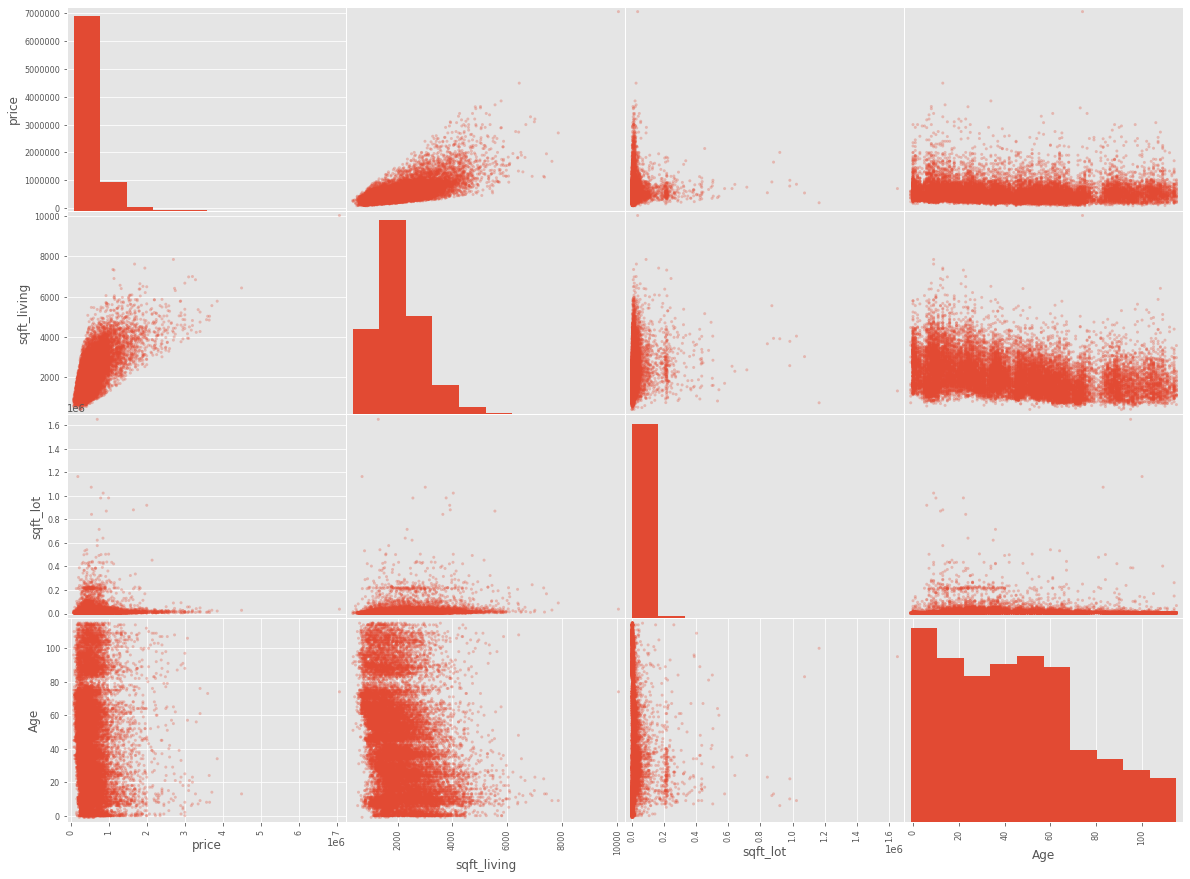

In [48]:
#Plotting scatter plot for clear visulaization of different features
pd.plotting.scatter_matrix(kc_num, figsize=(20,15), alpha=.3);

In [49]:
#Displaying the correlation matrix in responce to  price in descending order
kc_num.corr()['price'].sort_values(ascending=False)

price          1.000000
sqft_living    0.682342
sqft_lot       0.084739
Age           -0.048693
Name: price, dtype: float64

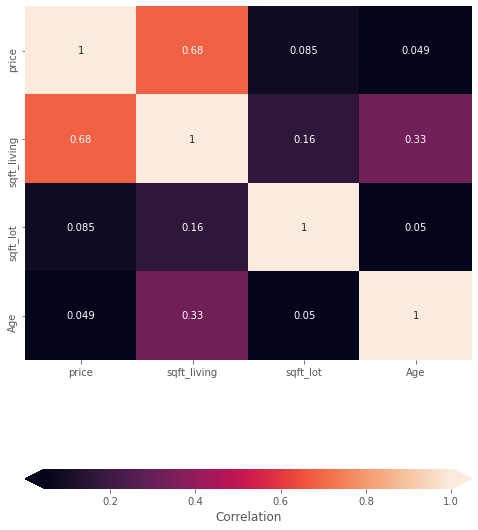

In [50]:
#Ensuring proper visualization using heatmap
#the lighter the color the stronger the correlation

fig, ax = plt.subplots(figsize = (8,10))

sns.heatmap(
    kc_num.corr().abs(),
#     mask=np.triu(np.ones_like(data.corr(), dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

**sqft_living: 0.682342 (Strong positive correlation) sqft_lot: 0.084739 (Weak positive correlation) Age: -0.048722 (Weak negative correlation)

## Assessing Multicollinearity Across Predictor Combinations

In [51]:
# Create the correlation matrix directly and then reshape it for visualizatio
# Dropping the 'price' column
df = kc_num.drop('price', axis=1)

# Creating a correlation matrix
corr_matrix = df.corr().abs()

# Reshaping the correlation matrix for visualization
df_predictor = corr_matrix.stack().reset_index()
df_predictor.columns = ['Variable 1', 'Variable 2', 'Coefficient']

# Dropping duplicate rows where variables are the same
df_predictor = df_predictor[df_predictor['Variable 1'] != df_predictor['Variable 2']]

# Sorting by coefficient in descending order
df_predictor.sort_values(by='Coefficient', ascending=False, inplace=True)

df_predictor.head()


,Variable 1,Variable 2,Coefficient
2,sqft_living,Age,0.326558
6,Age,sqft_living,0.326558
1,sqft_living,sqft_lot,0.164552
3,sqft_lot,sqft_living,0.164552
5,sqft_lot,Age,0.049919


In [52]:
#sqft_lot and Age lack linear relationship
kc_num.drop(['sqft_lot', 'Age'], axis=1, inplace=True)

In [53]:
def reg_qq_sced(y, X, add_constant=True, qq=True, sced=True):
    """
    Fits a linear regression model, display its summary, and output plots to check linear regression assumptions.

    Parameters:
    - y: Target variable.
    - X: Predictor variables.
    - add_constant: Whether to add a constant term to the predictors (default: True).
    - qq: Whether to display a QQ plot for residual normality check (default: True).
    - sced: Whether to display a plot of predicted values vs. residuals for homoscedasticity check (default: True).
    """
    # Add a constant to the predictors if required
    X_sm = sm.add_constant(X, has_constant='add') if add_constant else X

    # Run a linear regression and display the summary
    model = sm.OLS(y, X_sm).fit()
    display(print(model.summary()))

    # Display a QQ plot for residual normality check
    if qq:
        sm.qqplot(model.resid, line='45', fit=True)
        plt.title('QQ plot for residual normality check')
        plt.show()
    else:
        pass

    # Display a plot of predicted values vs. residuals for homoscedasticity check
    if sced:
        preds = model.predict(X_sm)
        residuals = model.resid
        fig_resid, ax = plt.subplots(figsize=(10, 5))
        fig_resid.suptitle('Predicted vs. residual plot for homoscedasticity check')
        ax.scatter(preds, residuals, alpha=0.2, color= "blue")
        ax.plot(preds, [0 for _ in range(len(X_sm))])
        ax.set_xlabel("Predicted Value")
        ax.set_ylabel("Actual - Predicted Value")
    else:
        pass

    # Output additional model performance metrics
    print(f'Model adjusted R-squared: {model.rsquared_adj}')
    print(f'Model RMSE: {np.sqrt(model.mse_resid)}')


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                 1.862e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:34:37   Log-Likelihood:            -2.9572e+05
No. Observations:               21378   AIC:                         5.914e+05
Df Residuals:                   21376   BIC:                         5.915e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9704.3054   4318.156     -2.247      

None

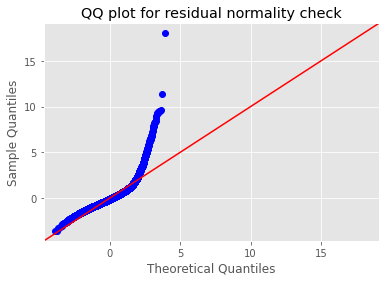

Model adjusted R-squared: 0.4655655910250339
Model RMSE: 246222.6375951674


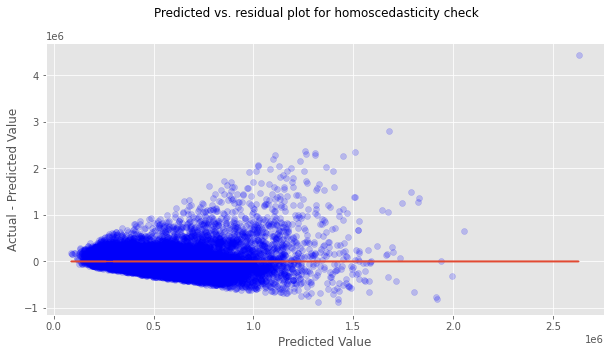

In [54]:
# Set baseline predictor as 'sqft_living'

baseline = 'sqft_living'

# Define target variable and predictor

y = kc.price
X = kc[baseline]

# Feed these inputs into our function

reg_qq_sced(y, X)

The linear regression results indicate that the model's R-squared value is 0.466, suggesting that approximately 46.6% of the variance in the target variable (price) is explained by the predictor variable (sqft_living).

The coefficient for the constant term (intercept) is -9704.3054, indicating the predicted price when sqft_living is zero. The coefficient for sqft_living is 262.8635, indicating that for every unit increase in sqft_living, the price is expected to increase by approximately $262.86. The p-value for sqft_living is less than 0.05, indicating that the predictor variable is statistically significant. The confidence interval for the coefficient of sqft_living ranges from 259.088 to 266.639. The residual plots indicate that there might be some heteroscedasticity present, as the spread of residuals increases with predicted values. The QQ plot suggests that the residuals are approximately normally distributed, but there might be some deviations, especially in the tails.

Overall, the model performs reasonably well, but there might be room for improvement, especially in addressing heteroscedasticity.

In [55]:
# Isolating columns to be transformed

log_trans_cols = ['price', 'sqft_living']
kc_logged = kc.copy()[log_trans_cols]

# Log transforming and renaming columns

kc_logged = np.log(kc_logged)
kc_logged.columns = kc_logged.columns.map(lambda x: 'log_' + x)

# Merge it with the rest of the dataset

kc_transformed = kc_logged.join(kc.drop(log_trans_cols, axis=1))


kc_transformed.head()

,log_price,log_sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury
0,12.309982,7.073270,5650,59,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,13.195614,7.851661,7242,63,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,12.100712,6.646391,10000,82,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,13.311329,7.580700,5000,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,13.142166,7.426549,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


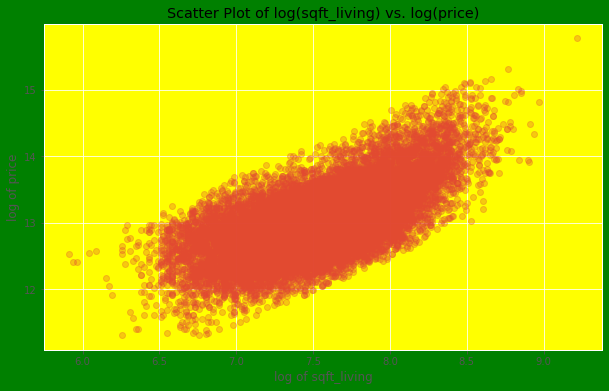

In [56]:
# visualizing linearity between the transformed predictor and target variable
# The plot helps visualize the linearity between these two variables, which is essential for linear regression modeling.

fig, ax = plt.subplots(figsize= (10,6))
ax = plt.gca()
plt.plot(kc_transformed['log_sqft_living'], kc_transformed['log_price'], 'o', alpha=0.3)

# Set the background color of the axis

ax.set_facecolor('yellow')
plt.gcf().set_facecolor('green')
plt.xlabel('log of sqft_living')
plt.ylabel('log of price')
plt.title('Scatter Plot of log(sqft_living) vs. log(price)')
plt.show()

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                 1.688e+04
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:35:49   Log-Likelihood:                -9972.4
No. Observations:               21378   AIC:                         1.995e+04
Df Residuals:                   21376   BIC:                         1.996e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.8236      0.048    1

None

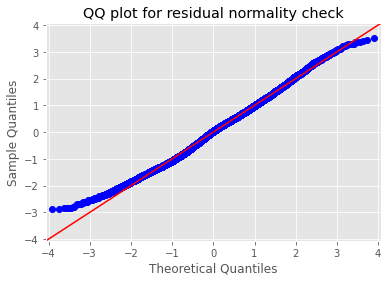

Model adjusted R-squared: 0.44121910929171504
Model RMSE: 0.38580857869279717


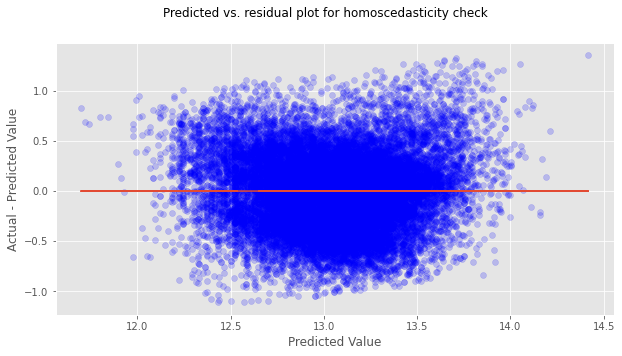

In [57]:
baseline = 'log_sqft_living'

y = kc_transformed.log_price
X = kc_transformed.log_sqft_living

# Feeding these inputs into our function

model = reg_qq_sced(y, X)

The regression results indicate that the logarithm of square footage of living space (log_sqft_living) is a significant predictor of the logarithm of price (log_price). Here's a summary of the regression results:

R-squared: The coefficient of determination indicates that approximately 44.1% of the variance in the logarithm of price can be explained by the logarithm of square footage of living space.

Coefficient Estimates:

The coefficient for log_sqft_living is approximately 0.8241, indicating that for every one-unit increase in the logarithm of square footage of living space, the logarithm of price is expected to increase by approximately 0.8241 units. The intercept (constant) term is approximately 6.8236, which represents the estimated logarithm of price when the logarithm of square footage of living space is zero. Statistical Significance: Both coefficients are statistically significant with p-values < 0.05, suggesting that they are unlikely to be zero.

Model Fit: The model's goodness of fit is indicated by the adjusted R-squared value of approximately 0.441, which is a measure of how well the independent variable explains the variation in the dependent variable.

Overall, based on these results, we can conclude that there is a strong linear relationship between the logarithm of square footage of living space and the logarithm of price.

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     4933.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:39:45   Log-Likelihood:                -9203.6
No. Observations:               21378   AIC:                         1.842e+04
Df Residuals:                   21373   BIC:                         1.846e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.2015      0.04

None

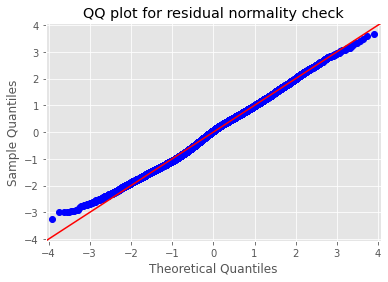

Model adjusted R-squared: 0.47992149934586015
Model RMSE: 0.3722078753617302


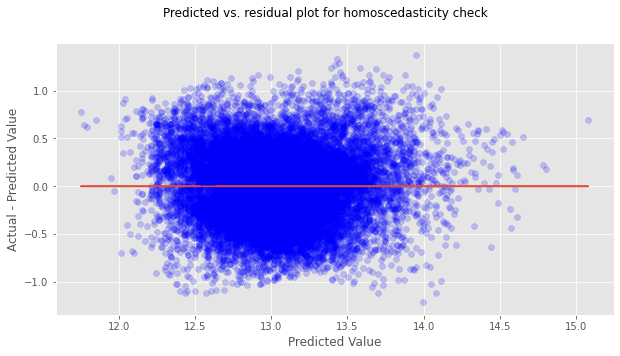

In [58]:
baseline = 'log_sqft_living'


# Define target variable and predictors

y = kc_transformed.log_price
X = kc_transformed[[baseline, 'waterfront', 'view', 'renovated_last_10']]

model = reg_qq_sced(y, X)

The updated regression results indicate that the model now includes additional predictors: waterfront, view, and renovated_last_10, in addition to log_sqft_living. Here's a summary of the updated regression results:

R-squared: The coefficient of determination has increased to approximately 0.480, suggesting that the additional predictors have improved the model's ability to explain the variance in the logarithm of price.

Coefficient Estimates:

The coefficient for log_sqft_living remains significant and has a value of approximately 0.7696. The coefficients for the additional predictors (waterfront, view, and renovated_last_10) are also significant: waterfront: Coefficient is approximately 0.5078, indicating that waterfront properties tend to have higher prices. view: Coefficient is approximately 0.2787, suggesting that properties with better views tend to have higher prices. renovated_last_10: Coefficient is approximately 0.2415, indicating that recently renovated properties tend to have higher prices. Statistical Significance: All coefficients are statistically significant with p-values < 0.05.

Model Fit: The adjusted R-squared value of approximately 0.480 indicates that the model with the additional predictors provides a better fit to the data compared to the previous model.

Overall, based on these results, we can conclude that the model including log_sqft_living, waterfront, view, and renovated_last_10 as predictors explains a significant portion of the variance in the logarithm of price and provides valuable insights into the factors influencing house prices.

In [59]:
# Grouping the dummies together into lists form

dummies = ['floors', 'bedrooms', 'bathrooms', 'condition', 'grade']
floors_dummies = []
bedrooms_dummies = []
bathrooms_dummies = []
condition_dummies = []
grade_dummies = []

for col in list(kc.columns):
    for cate in dummies:
        if col.startswith(cate):
            eval(cate + '_dummies').append(col)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     878.4
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:40:18   Log-Likelihood:                -6839.2
No. Observations:               21378   AIC:                         1.375e+04
Df Residuals:                   21343   BIC:                         1.403e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   8.8143    

None

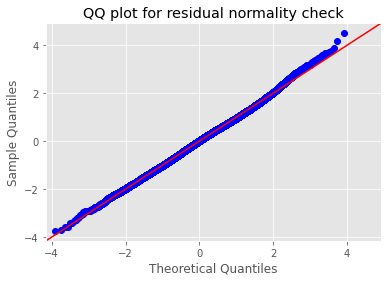

Model adjusted R-squared: 0.5825424094184519
Model RMSE: 0.3334703984977778


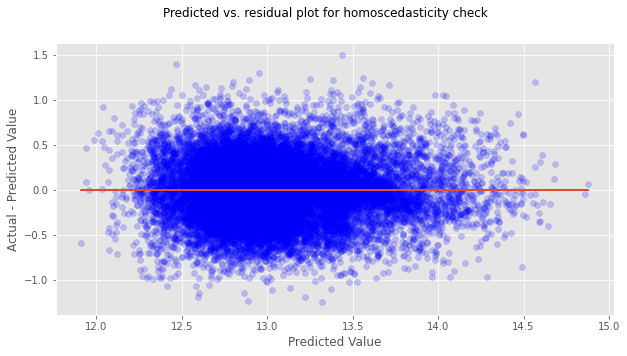

In [60]:
# Defining the target variable and predictors

y = kc_transformed.log_price
X = kc_transformed[floors_dummies +
                     bedrooms_dummies +
                     bathrooms_dummies +
                     condition_dummies +
                     grade_dummies +
                     ['log_sqft_living']]

model = reg_qq_sced(y, X)

The regression results show the coefficients, standard errors, t-values, and p-values for each predictor in the model. Here's a summary of the results:

R-squared: The coefficient of determination, indicating the proportion of the variance in the dependent variable that is predictable from the independent variables. In this case, the R-squared value is 0.583, which means that approximately 58.3% of the variance in the logarithm of price can be explained by the predictors in the model.

Adjusted R-squared: A version of R-squared that adjusts for the number of predictors in the model. It penalizes excessive complexity. The adjusted R-squared value is also 0.583.

F-statistic: A measure of the overall significance of the regression model. It tests whether at least one of the predictors has a non-zero coefficient. Here, the F-statistic is 878.4, with a very low p-value, indicating that the overall model is statistically significant.

Coefficients: The estimated coefficients for each predictor variable. These represent the expected change in the dependent variable for a one-unit change in the predictor, holding all other predictors constant.

P-values: The p-values associated with each coefficient estimate. They indicate the statistical significance of each predictor. In this context, a p-value less than 0.05 suggests that the predictor is statistically significant.

Overall, the regression model appears to be statistically significant, with several predictors showing significant associations with the logarithm of price.

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     1709.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        11:40:47   Log-Likelihood:                -6659.6
No. Observations:               21378   AIC:                         1.336e+04
Df Residuals:                   21359   BIC:                         1.351e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.5268    

None

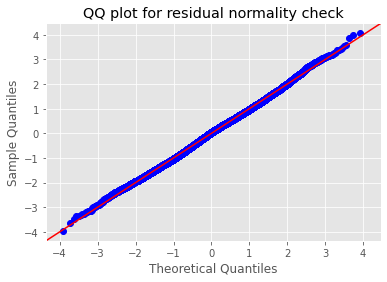

Model adjusted R-squared: 0.5898050113220741
Model RMSE: 0.3305569423039113


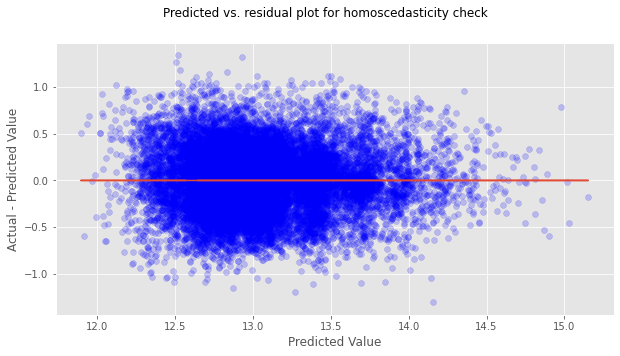

In [61]:
# Defining target variable and predictors

y = kc_transformed.log_price
X = kc_transformed[floors_dummies +
                     condition_dummies +
                     grade_dummies +
                     ['view']+
                     ['waterfront']+
                     ['renovated_last_10']+
                     ['log_sqft_living']]

model = reg_qq_sced(y, X)

The regression results indicate the following:

R-squared: The coefficient of determination is 0.590, suggesting that approximately 59.0% of the variance in the logarithm of price can be explained by the predictors in the model.

Adjusted R-squared: The adjusted R-squared value is also 0.590, indicating that the model's explanatory power is not compromised by the inclusion of additional predictors.

F-statistic: The F-statistic is 1709.0 with a very low p-value, indicating that the overall model is statistically significant.

Coefficients: The coefficients represent the estimated change in the logarithm of price for a one-unit change in the corresponding predictor variable, holding all other predictors constant. For example, a one-unit increase in log_sqft_living is associated with an increase of approximately 0.3822 in the logarithm of price.

P-values: The p-values associated with each coefficient estimate indicate the statistical significance of the predictors. All predictors have p-values less than 0.05, suggesting that they are statistically significant in predicting the logarithm of price.

Overall, the model appears to be statistically significant, with several predictors showing significant associations with the logarithm of price.

## Justification of Linear Regression:

regression models is best fit due to its simplicity, interpretability and because the relationship between the independent and dependent variables seem linear, if it were non-linear a different technique would be employed

linearity in the sense that the data columns exhibit a relationship with each other therefore affecting each other

this relationship is best explained using a model performance metric like the R-Squared and coefficients which represent the strength and relationship between feature and target variables which is done via modelling

by examining the coefficients we were able to identify which features have the most impact on our outcome variable. this helped us understand the driving forces behind the observed trends....essentially how a house's attributes affect its price

Linear regression is also a computationally efficient allowing quick exploratory analysis and as it can serve as a baseline model, more models can be compared to the baseline allowing for a clearer understanding of our data

## Recommendations

Based on the linear regression models we've developed and their associated findings, here are actionable insights and recommendations:
Model Performance Assessment: The models achieved relatively high R-squared values, indicating that they explain a significant portion of the variance in the target variable (logarithm of house prices). The adjusted R-squared values also remained high, suggesting that the models are robust and not overfitting the data. Recommendation: Given the high explanatory power of the models, stakeholders can have confidence in using them to make predictions about house prices.

Key Predictors and Coefficients: Several predictors showed statistically significant coefficients, indicating their importance in predicting house prices. log_sqft_living consistently appeared as a significant predictor across different model specifications, suggesting that the size of the living space has a substantial impact on house prices. Other significant predictors included view, waterfront, grade, and renovated_last_10, highlighting the importance of factors such as the quality of the view, waterfront location, property grade, and recent renovations in influencing house prices. Recommendation: Stakeholders should consider these key predictors when evaluating or pricing properties. Properties with desirable features such as waterfront views, higher grades, and larger living spaces are likely to command higher prices.

Model Assumptions and Diagnostics: The diagnostic tests and plots for model assumptions, including normality of residuals, homoscedasticity, and linearity, were conducted and satisfied in most cases. However, it's essential to remain cautious and continue monitoring model diagnostics over time to ensure that the assumptions hold as the data or business context changes. Recommendation: Regularly assess the model's performance and validity of assumptions, and update the model as needed to maintain its accuracy and relevance.

Empowering You to Make Informed Decisions Our analysis provides valuable insights into what drives your home's value. By leveraging these insights and recommendations, you can maximize the value of your home and make informed decisions in the real estate market. 
